# COGS 108 Final Project 

# Names

- Joshua Chan
- Dustin Lebsock
- Avi Cramer
- Ying Wu

# Group Members IDs

- A13807165
- A13463368
- A########
- A92060788

# Overview

In this final project, we utilize the data analysis methods learnt from COGS 108 to analyze CAPE data. CAPE administers a standardized evaluation of UCSD's undergraduate courses and professors. We seek to investigate if STEM classes and non-STEM classes would have some significant difference in distribution in evaluations.

# Research Question

Question: Is there a statistically significant difference in distributions between STEM classes and non-STEM classes in **Time Spent**, **GPA Average**, **Recommended Instructor**, and **Recommend class**?

## Background and Prior Work

Every quarter, at the end of Week 9, while students are on their toes itching to cram for their
finals, the university executes its quarterly student-teacher evaluation system, CAPE (course and Professor Evaluations). Student feedback is used to gauge the caliber of the university’s curriculum and its faculty. Inside the survey, CAPE asks a wide variety of questions, such as what grade the student expects to receive, whether they recommend the professor, whether or not they recommend the class, and so on. Most of this data is available to UCSD students, and is searchable on http://cape.ucsd.edu/ , where students can access the data to advise them on which classes to take in the following quarter.

This question is interesting because there is a social stigma around non-stem majors at UCSD. This might be because UCSD is a power house particularly for STEM type of research, but is there a statistically significant difference between STEM and non-STEM majors in terms of work ethic, grades and departments? As all of us being in a STEM major, in a STEM class this interesting to know if we have to ‘work harder’ for our grades, and if STEM professors are more highly praised versus non-STEM. Is this fair?

The background information that led to our hypothesis is just being apart of the social culture here at UCSD. STEM majors have long been praised, in the US as a whole, as being the type of majors that lead to a steady income. With classes highly encouraging CAPE evaluations and publishing their results, this led to theorizing our hypothesis.

It is important to know the major differences between STEM majors and non-STEM majors at UCSD to help understand how they prepare us for post-graduation. A deflated GPA for STEM majors when, when compared to non-STEM, should be taken into account for graduate schools for example. Higher recommended instructor scores shows the difference in quality of education between the two. Most importantly, these tests will encourage (or deter) in choosing between a STEM major and non-STEM at UCSD.

## Data Used

The dataset used for our project is obtained from smartercapes’ public dataset on github found at the following URL: 

- (https://github.com/andportnoy/smartercapes.com/blob/master/data.csv)
- (https://github.com/COGS108/FinalProjects-Sp17/blob/master/026-FinalProject.ipynb)
- (http://smartercapes.com/)

# Hypothesis

Hypothesis (predictions): STEM classes have lower GPA average, higher time spent, lower recommended instructor, and higher recommended class. This is because UCSD is a stem school and stem classes are harder.

Since our hypothesis includes a range of predictors, a hypothesis for each predictor is required to answer the question:

Null Hypothesis for **Time Spent**
- H0: STEM Classes have no statistically significant difference in distribution with non-STEM classes in Time spent.
- Ha: STEM Classes have a statistically significant difference in distribution with non-STEM classes in Time spent. 

Null Hypothesis for GPA Average
- H0: STEM Classes have no statistically significant difference in distribution with non-STEM classes in GPA Average
- Ha: STEM Classes have a statistically significant difference in distribution with non-STEM classes in GPA Average. 

Hypothesis for Recommend Instructor
- H0: STEM Classes have no statistically significant difference in distribution with non-STEM classes in Recommend Instructor
- Ha: STEM Classes have a statistically significant difference in distribution with non-STEM classes in Recommended Instructor. 

Null Hypothesis for Recommend Course
- H0: STEM Classes have no statistically significant difference in distribution with non-STEM classes in Recommend Course.
- Ha: STEM Classes have a statistically significant difference in distribution with non-STEM classes in Recommend Course

Null Hypothesis for GPA Guesses
- H0: Students in STEM classes and Non-STEM classes have no statistically significant difference in their approximation of their final grade.
- Ha: Students in STEM classes and Non-STEM classes have a statistically significant difference in their approximation of their final grade.



# Setup

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import matplotlib.pyplot as plt
import statsmodels.api as sm
# Sets the visualization style for Seaborn
sns.set_style("darkgrid")

# Dataset

In [26]:
# initialize the dataframe
df = pd.read_csv('data.csv')

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Data Cleaning

The data set is already quite clean when we utilized it. However, we only want to keep the columns that are relevant to our question, so we only kept those columns. Part of this reason is to make the dataframe look nicer, and part of the reason is to speed up the permutation test simulations in later parts of the code.

In [27]:
# Drop some of the irrelevant columns to our analysis
df = df[['course', 'rcmnd_class', 'rcmnd_instr', 'time','gpa_expected', 'gpa_actual']]
df.head()

,course,rcmnd_class,rcmnd_instr,time,gpa_expected,gpa_actual
0,ANSC 122,0.933,0.933,4.90,3.50,3.42
1,ANTH 102,1.000,0.833,2.81,3.50,3.72
2,ANTH 2,0.857,1.000,4.17,3.75,3.58
3,ANTH 21,0.786,1.000,8.21,3.33,3.07
4,ANTH 23,0.952,1.000,5.83,3.50,3.76


Because a large focus of the project is to identify differences in characteristics between STEM classes and non-STEM classes, we have to create a new column that identifies whether or not the class is a STEM class or not. 1 denotes it is a STEM class, and 0 denotes not a STEM class. This is done in the data cleaning process below.

In [28]:
# Find the first element of the course by splitting it and finding the first index.
department = df['course'].apply(lambda x: x.split(' ')[0])

# If the class is in one of these departments, it is classified as a STEM class
def categorize_stem(data):
    stem = ['MATH','CHEM','MAE','COGS','PHYS','BIMM','SIO','SE','BENG','BILD','CENG','BIPN','BIBC','BIDC','NANO','BIEB','ECE','CSE','BISP','BICD','BICD']
    if data in stem:
        return 1
    return 0

df['STEM'] = department.apply(categorize_stem)
df.head()

,course,rcmnd_class,rcmnd_instr,time,gpa_expected,gpa_actual,STEM
0,ANSC 122,0.933,0.933,4.90,3.50,3.42,0
1,ANTH 102,1.000,0.833,2.81,3.50,3.72,0
2,ANTH 2,0.857,1.000,4.17,3.75,3.58,0
3,ANTH 21,0.786,1.000,8.21,3.33,3.07,0
4,ANTH 23,0.952,1.000,5.83,3.50,3.76,0


# Data Analysis & Results

## Part 1: A/B (Permutation) Testing

How can we test if there exists a difference in distribution between STEM classes and non-STEM classes for certain categories? (e.g. rcmnd_class, rcmnd_instr, time, gpa_actual, diff in grade expected) This is where A/B testing, or permutation testing is useful. Permutation testing allows us to statistically determine if two distributions are different. This is done by randomly shuffling the 'STEM' column without replacement, and then finding the average rcmnd_class, rcmnd_instr, time, gpa_actual, diff in grade expected for STEM and non-STEM classes. This allows us to simulate the null hypothesis one time. We repeat this simulation 5,000 times and graph where the observed value lies amidst the distribution of null hypothesis simulations.

In [29]:
# This function simulates the null hypothesis 
def simulate_null(column):
    shuffle = df['STEM'].sample(replace = False, frac = 1).reset_index(drop = True)
    shuffled_original = (df.assign(**{'Shuffled Default':shuffle}))
    return shuffled_original.groupby('STEM')['Shuffled Default'].mean().diff()[1]

Here we generate the p-values for the permutation tests.

In [30]:
columns = ['rcmnd_class', 'rcmnd_instr', 'time', 'gpa_actual']
obs_dict = {}
for i in columns:
    obs_dict[i] = df.groupby('STEM')[i].mean().diff()[1]
obs_dict

{'gpa_actual': -0.2552498236602614,
 'rcmnd_class': -0.03587176821629601,
 'rcmnd_instr': -0.06218605760145146,
 'time': 2.3089715070247365}

### A/B Test on Recommended Class

In [31]:
# Simulate the null hypothesis 5,000 times
rcmnd_class_list = []
for j in range(5000):
    rcmnd_class_list.append(simulate_null('rcmnd_class'))

Text(0,0.5,u'Frequency')

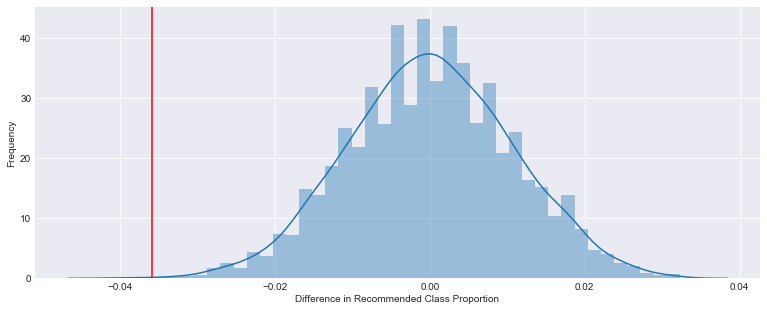

In [32]:
# And graph the null hypothesis into a histogram. We can graph the observed value onto the histogram.
fig, axs = plt.subplots(figsize = (13, 5))
sns.distplot(rcmnd_class_list, hist = True)
plt.axvline(-0.03587176821629601, 0, 2, color = 'red')
plt.xlabel('Difference in Recommended Class Proportion')
plt.ylabel('Frequency')

The histogram depicts the distribution of simulations that describe the difference in recommended class proportion under the null hypothesis. As we can see, the observed value on the left side of the distribution, where the significance level is extremely small. If the p-value (below) is below 0.05, we will reject the null hypothesis.

Text(0,0.5,u'Frequency')

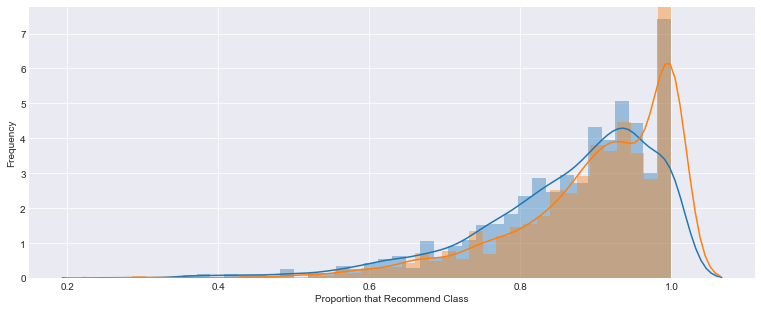

In [33]:
fig, axs = plt.subplots(figsize= (13, 5))
sns.distplot(df[df['STEM'] == 1]['rcmnd_class'])
sns.distplot(df[df['STEM'] == 0]['rcmnd_class'])
plt.xlabel('Proportion that Recommend Class')
plt.ylabel('Frequency')

In [34]:
class_p_value = np.count_nonzero(rcmnd_class_list < obs_dict['rcmnd_class'])/5000
class_p_value

0

Because the p-value of ~0.0005 (changes slightly per simulation) is less than our significance level of 0.05, we reject the null hypothesis. We can statistically conclude that the distributions between Stem and Non-Stem majors on their recommended class rate is different. This seems to suggest that on average, STEM classes have lower recommended class rates than non-STEM classes.

### A/B Test on Recommended Instructor

In [35]:
rcmnd_instr_list = []
for j in range(5000):
    rcmnd_instr_list.append(simulate_null('rcmnd_instr'))

Text(0,0.5,u'Frequency')

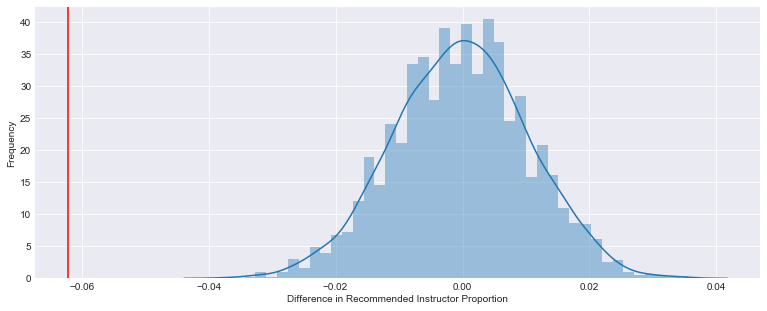

In [36]:
fig, ax = plt.subplots(figsize= (13, 5))
sns.distplot(rcmnd_instr_list, hist = True)
plt.axvline(-0.06218605760145146, 0, 2, color = 'red')
plt.xlabel('Difference in Recommended Instructor Proportion')
plt.ylabel('Frequency')

Text(0,0.5,u'Frequency')

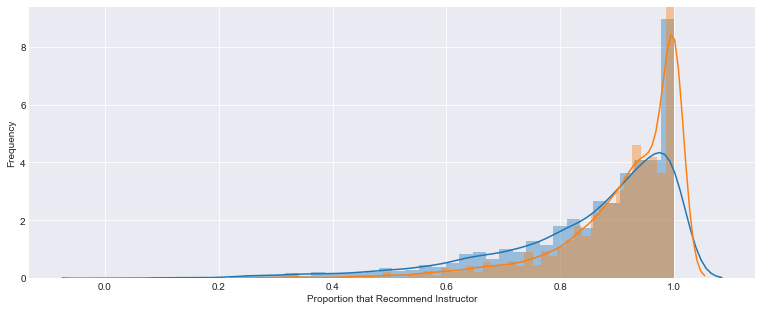

In [37]:
fig, ax = plt.subplots(figsize= (13, 5))
sns.distplot(df[df['STEM'] == 1]['rcmnd_instr'])
sns.distplot(df[df['STEM'] == 0]['rcmnd_instr'])
plt.xlabel('Proportion that Recommend Instructor')
plt.ylabel('Frequency')

The histogram depicts the distribution of simulations that describe the difference in recommended instuctor proportion under the null hypothesis. As we can see, the observed value on the left side of the distribution, where the significance level is extremely small. If the p-value (below) is below 0.05, we will reject the null hypothesis.

In [38]:
instr_p_value = np.count_nonzero(rcmnd_instr_list < obs_dict['rcmnd_instr'])/5000
instr_p_value

0

Because the p-value of 0 is less than our significance level of 0.05, we reject the null hypothesis. We can statistically conclude that the distributions between Stem and Non-Stem majors on their recommended instructor rate is different. This seems to suggest that on average, STEM classes have lower recommended instructors than non-STEM classes.

### A/B Test on Time Spent 

In [39]:
time_list = []
for j in range(5000):
    time_list.append(simulate_null('time'))

Text(0,0.5,u'Frequency')

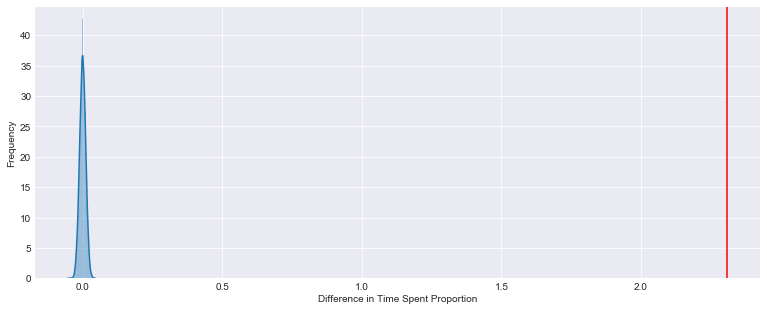

In [40]:
fig, ax = plt.subplots(figsize= (13, 5))
sns.distplot(time_list, hist = True)
plt.axvline(2.3089715070247365, 0, 2, color = 'red')
plt.xlabel('Difference in Time Spent Proportion')
plt.ylabel('Frequency')


Text(0,0.5,u'Frequency')

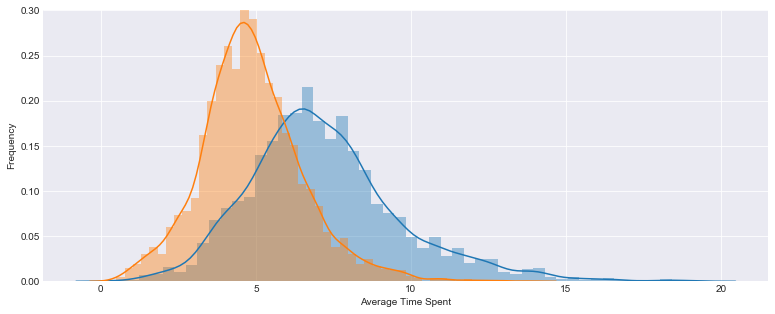

In [41]:
fig, ax = plt.subplots(figsize= (13, 5))
sns.distplot(df[df['STEM'] == 1]['time'])
sns.distplot(df[df['STEM'] == 0]['time'])
plt.xlabel('Average Time Spent')
plt.ylabel('Frequency')

The histogram depicts the distribution of simulations that describe the difference in time spent received under the null hypothesis. As we can see, the observed value on the left side of the distribution, where the significance level is extremely small. If the p-value (below) is below 0.05, we will reject the null hypothesis.

In [42]:
time_p_value = np.count_nonzero(time_list > obs_dict['time'])/5000
time_p_value

0

Because the p-value of 0 is less than our significance level of 0.05, we reject the null hypothesis. We can statistically conclude that the distributions between Stem and Non-Stem majors on how much time they spend per class is different. This seems to suggest that on average, students in STEM classes report higher time spent per class than non-STEM classes.

### A/B Test on GPA Difference

In [43]:
gpa_list = []
for j in range(5000):
    gpa_list.append(simulate_null('gpa_actual'))

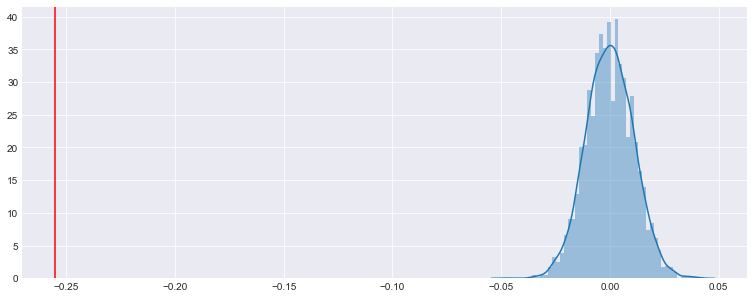

In [44]:
fig, ax = plt.subplots(figsize= (13, 5))
sns.distplot(gpa_list, hist = True)
plt.axvline(-0.2552498236602614, 0, 2, color = 'red')

Text(0,0.5,u'Frequency')

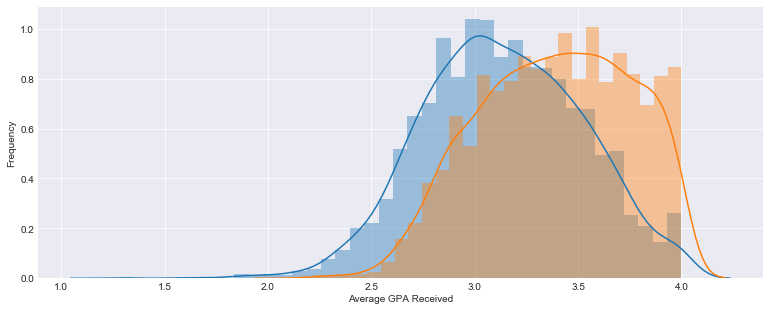

In [45]:
fig, ax = plt.subplots(figsize= (13, 5))
sns.distplot(df[df['STEM'] == 1]['gpa_actual'])
sns.distplot(df[df['STEM'] == 0]['gpa_actual'])
plt.xlabel('Average GPA Received')
plt.ylabel('Frequency')

The histogram depicts the distribution of simulations that describe the difference in actual GPA received proportion under the null hypothesis. As we can see, the observed value on the left side of the distribution, where the significance level is extremely small. If the p-value (below) is below 0.05, we will reject the null hypothesis.

In [55]:
grade_p_value = np.count_nonzero(gpa_list < obs_dict['gpa_actual'])/5000
grade_p_value

0

Because the p-value of 0 is less than our significance level of 0.05, we reject the null hypothesis. We can statistically conclude that the distributions between Stem and Non-Stem majors on how their average grade is different. This seems to suggest that on average, students in STEM classes have lower grades per class than non-STEM classes.

### Grade Approximation Permutation Test

In [47]:
df['gpa_difference'] = df['gpa_expected'] - df['gpa_actual']

gpa_diff_obs = df.groupby('STEM')['gpa_difference'].mean().diff()[1]
gpa_diff_obs 
# STEM majors more likely to overestimate their grade compared to non-STEM by .0438 under the CAPE data.

0.04379708276744132

In [48]:
gpa_diff_list = []
for j in range(5000):
    gpa_diff_list.append(simulate_null('gpa_difference'))

Text(0,0.5,u'Frequency')

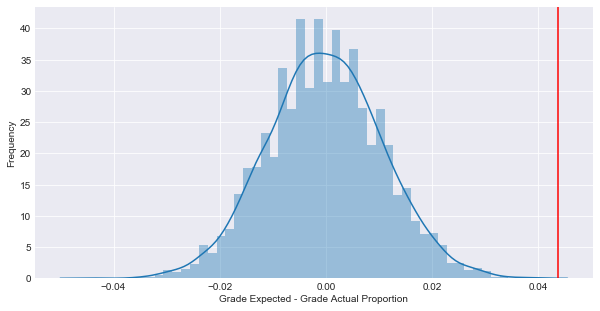

In [49]:
fig, ax = plt.subplots(figsize= (10, 5))
sns.distplot(gpa_diff_list, hist = True)
plt.axvline(0.04379708276744132, 0, 2, color = 'red')
plt.xlabel('Grade Expected - Grade Actual Proportion')
plt.ylabel('Frequency')

In [50]:
grade_diff_p_value = np.count_nonzero(gpa_diff_list > [0.04379708276744132])/5000
grade_diff_p_value

0

Because the p-value of 0 is less than our significance level of 0.05, we reject the null hypothesis. We can statistically conclude that the distributions between Stem and Non-Stem majors on how they approximate their grade is different. This seems to suggest that on average, students in STEM classes overestimate their final grade compared to non-STEM classes.

## Part 2: Linear Regression Modeling


                            OLS Regression Results                            
Dep. Variable:             gpa_actual   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     796.4
Date:                Tue, 11 Jun 2019   Prob (F-statistic):          1.38e-167
Time:                        18:01:15   Log-Likelihood:                -3751.2
No. Observations:                8529   AIC:                             7506.
Df Residuals:                    8527   BIC:                             7520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.4133      0.031     77.908      

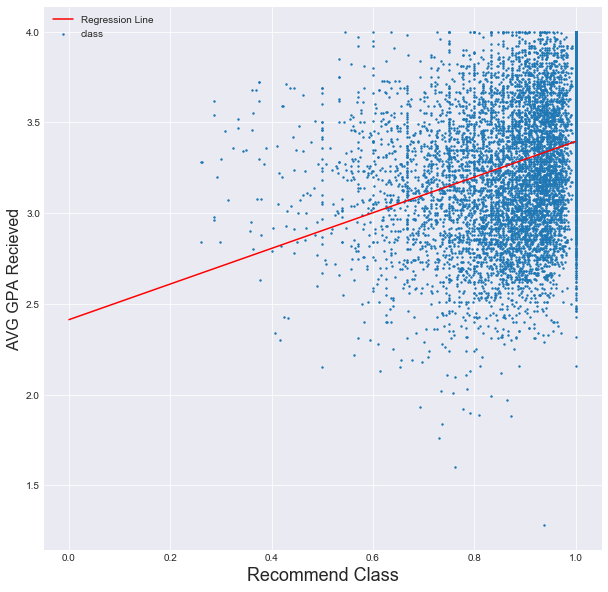

In [51]:
outcome, predictors = patsy.dmatrices('gpa_actual ~ rcmnd_class', df)
#'course', 'rcmnd_class', 'rcmnd_instr', 'time', 'gpa_actual'
mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())
plt.figure(figsize=(10,10))
plt.scatter(df['rcmnd_class'],df['gpa_actual'], s=2, label='class')

X_plot = np.linspace(0,1,100)
plt.plot(X_plot, res.params[0] + X_plot*res.params[1], color='red', label='Regression Line')
plt.xlabel('Recommend Class', fontsize=18)
plt.ylabel('AVG GPA Recieved', fontsize=16)

plt.legend()

plt.show()

The scatter plot comparing the actual GPA received versus the percentage of students who recommend the class shows a direct relationship between the two. According to the scatter plot, the regression line indicates that a student is more likely to recommend an instructor if they receive a higher grade in the class. Inversely, a student who recommends their instructor is likely to have received a higher grade in the class. The R-squared value for this comparison results in 0.085 showing that the recommending a class does have a relationship with average gpa recieved but not a high impact one. 

                            OLS Regression Results                            
Dep. Variable:            rcmnd_instr   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     6850.
Date:                Tue, 11 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:01:16   Log-Likelihood:                 7221.2
No. Observations:                8529   AIC:                        -1.444e+04
Df Residuals:                    8527   BIC:                        -1.442e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1824      0.009     21.311      

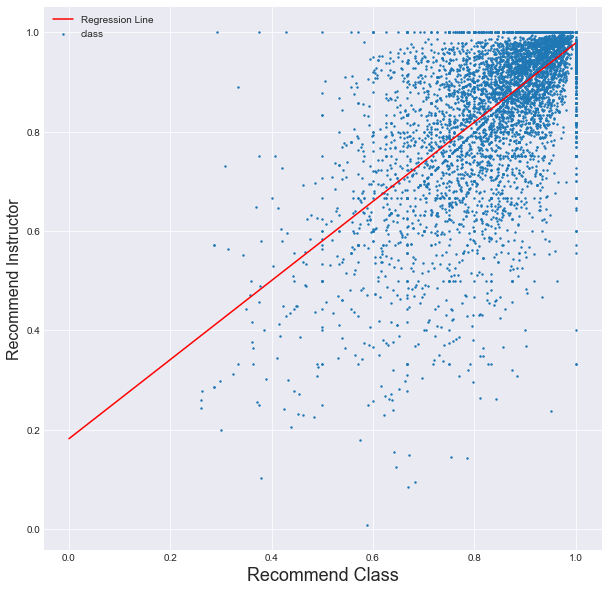

In [52]:
outcome, predictors = patsy.dmatrices('rcmnd_instr ~ rcmnd_class', df)
#'course', 'rcmnd_class', 'rcmnd_instr', 'time', 'gpa_actual'
mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())
plt.figure(figsize=(10,10))
plt.scatter(df['rcmnd_class'],df['rcmnd_instr'], s=2, label='class')

X_plot = np.linspace(0,1,100)
plt.plot(X_plot, res.params[0] + X_plot*res.params[1], color='red', label='Regression Line')
plt.xlabel('Recommend Class', fontsize=18)
plt.ylabel('Recommend Instructor', fontsize=16)
plt.legend()

plt.show()

Each point on the scatter plot represents a single class' average recommend class rating verse average recommend instructor rating. Using average recommend class score as a predictor, we ran a linear regression trying to predict the recommend instructor score. The recommend class variable showed a p-val of 0 which means it is statistically significant with an R squared value of 0.445. This is interesting because with a recommend class score alone, we are able to predict the recommend instructor value pretty well. Since the recommend class coefficient is 0.795, which is very close to 1, we can determine that most students put the same score for recommend instructor as they do for recommend class. (and since the intercept is nearly 0)

                            OLS Regression Results                            
Dep. Variable:             gpa_actual   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     1451.
Date:                Tue, 11 Jun 2019   Prob (F-statistic):          2.49e-293
Time:                        18:01:16   Log-Likelihood:                -3461.9
No. Observations:                8529   AIC:                             6928.
Df Residuals:                    8527   BIC:                             6942.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6560      0.011    343.939      0.0

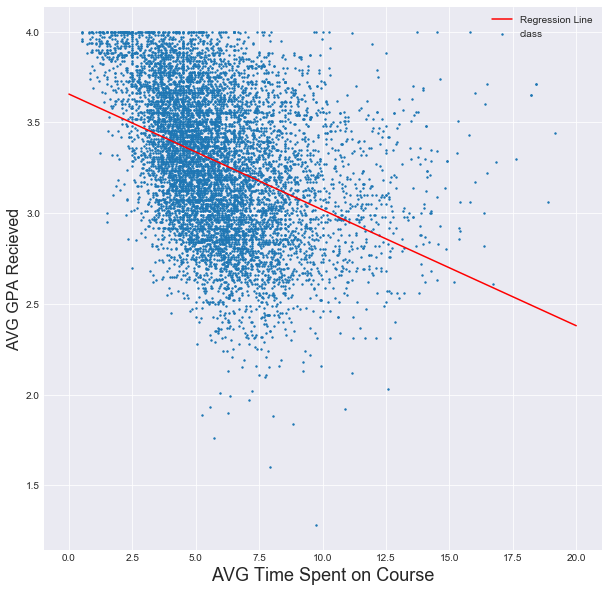

In [53]:
outcome, predictors = patsy.dmatrices('gpa_actual ~ time', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()

print(res.summary())

plt.figure(figsize=(10,10))
plt.scatter(df['time'],df['gpa_actual'], s=2, label='class')

X_plot = np.linspace(0,20,100)
plt.plot(X_plot, res.params[0] + X_plot*res.params[1], color='red', label='Regression Line')
plt.xlabel('AVG Time Spent on Course', fontsize=18)
plt.ylabel('AVG GPA Recieved', fontsize=16)
plt.legend()

plt.show()

The scatter plot for average time per week versus average GPA received shows an inverse relation between the two. According to the graph, classes that require a larger amount of time are more likely to have a lower GPA. Similarly, a class with a low average GPA received is likely to require more hours on average per week. The R-squared value for plotting these data points results in a value of 0.145. This indicates that 14.5% of the observed variation can be explained by the model’s input. This does not directly indicate the model is irrelevant. Because “time spent” is a data point resulting from a collective estimation by students, this element is likely to have a lot of variation due to the subjective nature of the element. 

                            OLS Regression Results                            
Dep. Variable:             gpa_actual   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     190.4
Date:                Tue, 11 Jun 2019   Prob (F-statistic):           2.75e-42
Time:                        18:01:16   Log-Likelihood:                -1633.6
No. Observations:                3746   AIC:                             3271.
Df Residuals:                    3744   BIC:                             3284.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3820      0.019    179.923      0.0

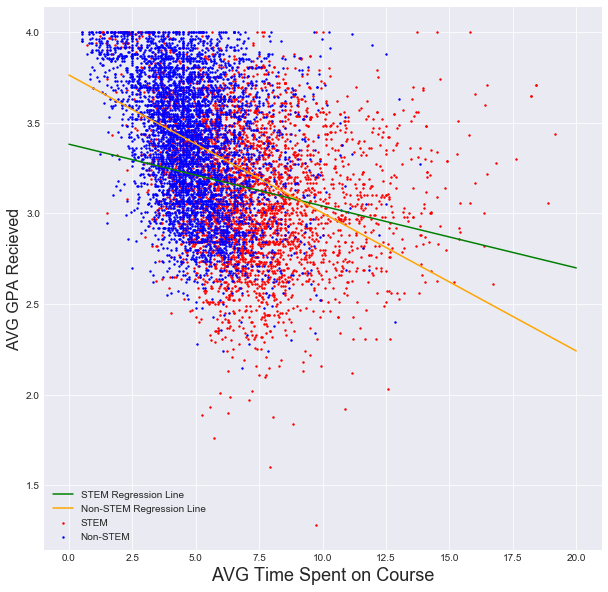

In [54]:
stem = df[df['STEM'] == 1]
nonstem = df[df['STEM'] == 0]

outcome_stem, predictors_stem = patsy.dmatrices('gpa_actual ~ time', stem)
outcome_nonstem, predictors_nonstem = patsy.dmatrices('gpa_actual ~ time', nonstem)

mod_stem = sm.OLS(outcome_stem, predictors_stem)
res_stem = mod_stem.fit()
print(res_stem.summary())

mod_nonstem = sm.OLS(outcome_nonstem, predictors_nonstem)
res_nonstem = mod_nonstem.fit()

print(res_nonstem.summary())

plt.figure(figsize=(10,10))

plt.scatter(stem['time'],stem['gpa_actual'], s=2, c='r', label='STEM')
plt.scatter(nonstem['time'],nonstem['gpa_actual'], s=2, c='b', label='Non-STEM')

X_plot = np.linspace(0,20,100)
plt.plot(X_plot, res_stem.params[0] + X_plot*res_stem.params[1], color='green', label='STEM Regression Line')

X_plot = np.linspace(0,20,100)
plt.plot(X_plot, res_nonstem.params[0] + X_plot*res_nonstem.params[1], color='orange', label='Non-STEM Regression Line')

plt.xlabel('AVG Time Spent on Course', fontsize=18)
plt.ylabel('AVG GPA Recieved', fontsize=16)

plt.legend()

plt.show()

The dataset was seperated out between stem and non-stem. Next the average time spent was used to predict average gpa recieved using linear regression for both stem and non-stem data sets. The regression line for both was then plotted on top of each dataset. The p-val for time in both data sets is 0, which implies significance. However, the R squared values for both are pretty low, which implies that time is useful for predicting average gpa for both stem and non-stem, it is not useful by itself. When comparing the lines between the two, there is a correlation for STEM to have lowever grades in less time spent on a course than non-STEM but to have higher grades on more time spent than non-STEM

# Ethics & Privacy

"Data science pursued in a manner that is equitable, with respect for privacy and consent, so as to ensure that it does not cause undue harm." We have always followed this standard while conducting our research and analy

The intent of our research is to experiment to see if there is a statistically significant difference in distributions between STEM classes and non-STEM classes in **Time spent**, **GPA Average**, **Recommended Instructor**, and **Recommend class**. We understand that data, algorithms and analysis are not objective because it is done by people who have biases and even data will have statistical bias.

The data for our project is available on public Github repositories and it is directly related to our question that we want to investigate. The data has be cleaned and include everything we need: name of professors, avg time spent, recommendation rate of the professor and class. 

The possible bias we might have is that UCSD is a public research school that has many strong engineering majors. People majoring in STEM majors are probably the majority on campus. From our experience, for example, Computer Science is one of the most impacted major in UCSD. The class size of computer science classes are usually large, most of them ranging from 60-300. Hence, we should consider the different number of STEM majors and non-STEM majors. The size of each group will affect our investigation. 

Many people may think that STEM classes are more difficult than non-STEM classes. We have made such hypothesis too. However, when cleaning and analyzing the data, we were putting effort to keep the process equitable and unsusceptible from any bias, because discrimination and bias driven by data and algorithms can give new scale to preexisting inequities. 

Our project is for research only. We will keep it only for academic uses and will not share any of the personal data involved in our project to unauthorized third party. 

# Conclusion & Discussion

The final conclusion we have reached is that there is a significant difference in distribution for STEM classes and non-STEM classes regarding **Time spent**, **GPA Average**, **Recommended Instructor**, and **Recommend class**. In our permutation test, for every single permutation test the p value was less than 0.05, which suggests that each permutation test i ran was statistically significant. In our linear regression modeling, the results suggest the same. Hence, our data analysis generally supports our hypothesis that STEM classes will tend to have have lower GPA average, higher time spent and lower recommended instructor. However, it denies our hypothesis in the sense that STEM classes actually tend to have a lower recommended classes.

Rather than suggesting that STEM classes take more time, have a lower GPA average and a lower recommended professor and class, there might be more factors to consider. For example, despite that STEM classes may be more challenging for students, so students would not recommend them generally. It is also likly that students in STEM classes tend to overestimate themselves and thus more likely to be disappointed by their final grade. Such disappointment could result in lower recommended class and recommended instructor. The size of the class, the unit of the class, the term of class, etc. could all be the potential factors that affect CAPE data.

Unfortunately, we do not and could not possess all data as we wish. However, we always keep in mind that our original data is limited by its nature so our final conclusion, yet reasonable and compelling, is also limited.